# Unsupervised word image extraction from historical handwritten texts using topological persistence

For the moment, we have built an unsupervised estimator which is able to extract lines of text from a scanned handwritten historical document. This is a beggining for a word image extraction.

**Warning**: if you want to reuse this notebook, you need to download the GW dataset from Lavrenko et al. [1] that you can find here (http://ciir.cs.umass.edu/downloads/gw/) and then change the data_root variable to match the directory in which you have downloaded it.

In [2]:
data_root = "../gw_20p_wannot"

## Extracting lines

To extract lines, I had the idea of using the mean of pixel value over each lines of pixel of the image. On the first page of the GW dataset [1], this gives the following graph :

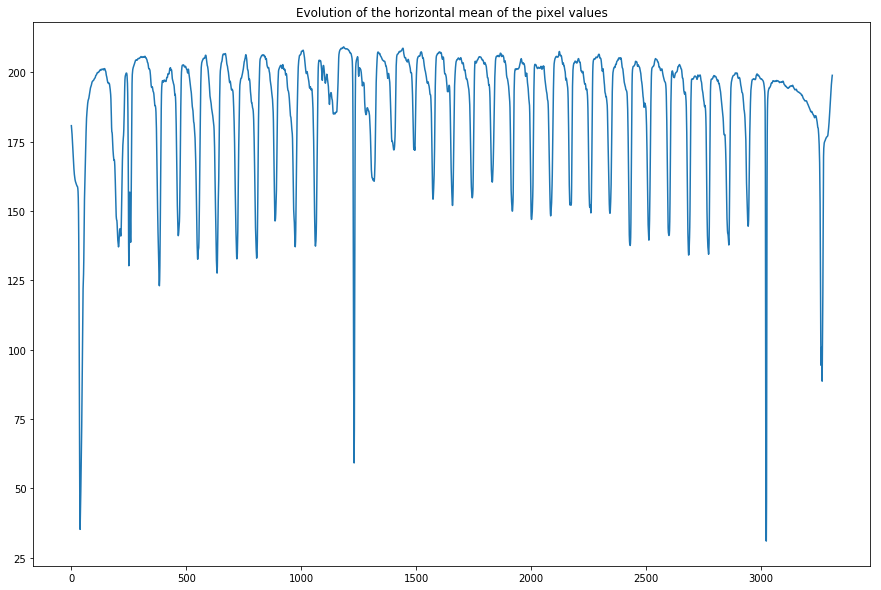

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

img = Image.open(os.path.join(data_root, "2700270.tif"))
X = np.array(img)
y = np.mean(X, axis=1)
plt.plot(y)
plt.title("Evolution of the horizontal mean of the pixel values")
plt.show()

A way to extract line would be to study the sublevels topology. We can do that by seeing the function as a persitence homology and perform a filtration. In other words, we will track the evolution of the topology of the sublevels of the function and pair threshold that create components with those that destroys them. We can then create a persistence diagram of points with birth and death of these components as coordinates as it is done in the following figure from drawn from *Geometric and Topological Inference* by J.-D. Boissonnat, F. Chazal and M. Yvinec. [2]

![title](png/figure1.png)

For that, we import our LineExtractor estimator and we apply it to our example.

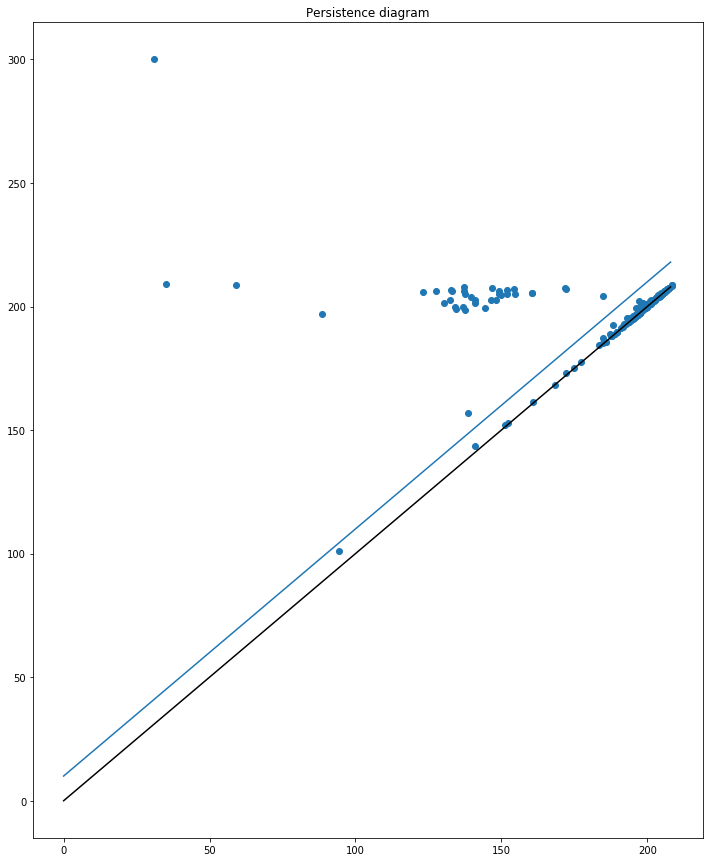

In [4]:
from line_extractor import LineExtractor

rcParams['figure.figsize'] = 12, 15

# We use a threshold of 5
LE = LineExtractor(infty=300, epsilon=10)

sets = LE.get_filtration(y)
LE.show_diagram()
plt.title("Persistence diagram")
plt.show()

The points that are close to the identity correspond to small fluctuation of the function. So, we fix a threshold s.t. points for which the distance from the identity is smaller than the threshold are ignored (in fact, the threshold used here is simply the offset of the blue limit).

Note: there is one point for which $y=300$. It is point corresponding to the lowest subset of our function. It is never destructed. So in theory it should be $y = \infty$.

Then, we can see what prediction give the kept points. In the following, we show the twenty first lines extracted from the first page of the GW dataset.


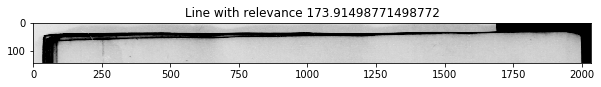

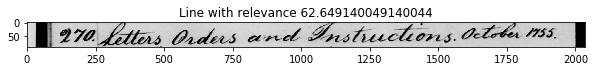

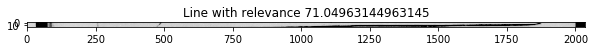

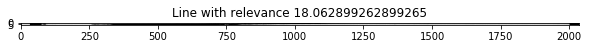

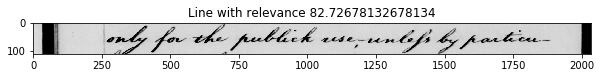

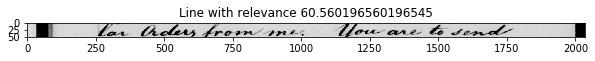

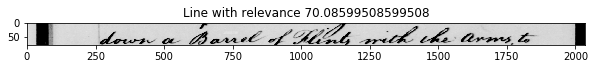

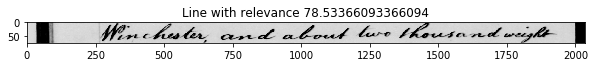

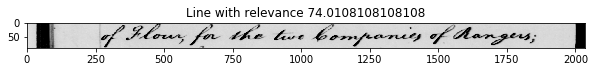

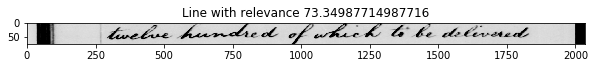

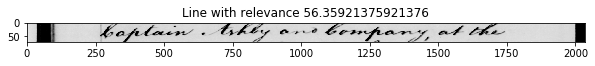

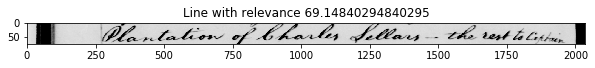

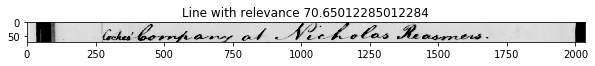

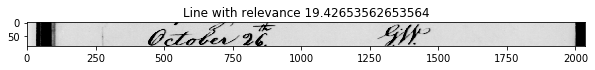

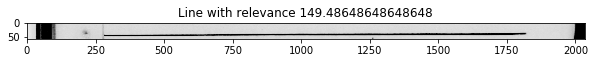

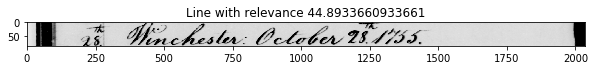

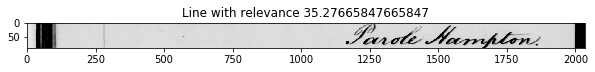

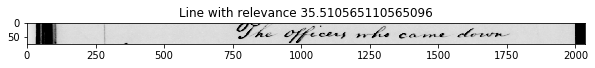

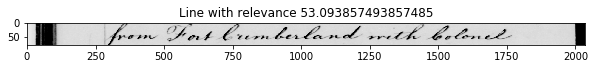

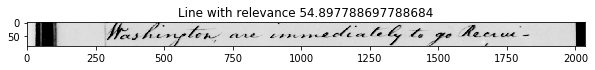

In [34]:
segments = LE.get_segments()
sortseg = sorted(segments)
sortsets = []
for s in sets:
    if s.target in [s[0] for s in sortseg]:
        sortsets.append(s)
sortsets = sorted(sortsets, key=lambda x: x.target)
rcParams['figure.figsize'] = 10, 20
lines = [X[seg[1]:seg[2]+1,:] for seg in sortseg]
lines = [np.dstack((elt, elt, elt)) for elt in lines]
for i,line in enumerate(lines[:20]):
    plt.imshow(line)
    plt.title("Line with relevance {}".format(sortsets[i].getRelevance()))
    plt.show()

We notice that the text lines are quite well cropped. However, a few line are extracted that don't contain any word. So in our pipeline for word extraction, we would need to add an estimator that could remove the outlier, or it could be dealt with directly by an HMM for extraction of words which could have states for things that are not words.

## References

[1] V. Lavrenko, T. M. Rath and R. Manmatha: Holistic Word Recognition for Handwritten Historical Documents. In: Proc. of the Intel Workshop on Document Image Analysis for Libraries (DIAL), Palo Alto, CA, January 23-24, 2004, pp. 278-287.

[2] J.-D. Boissonnat, F. Chazal, M. Yvinec. Geometric and Topological Inference. Cambridge Texts in Applied Mathematics, vol. 57, Cambridge University Press, 2018